In [2]:
pip install oracledb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.2 MB/s eta 0:00:00


In [3]:
import oracledb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import config

warnings.filterwarnings("ignore", category=UserWarning)

connection = oracledb.connect(user=config.user, password=config.password,
                              dsn=config.dsn)
cursor = connection.cursor()

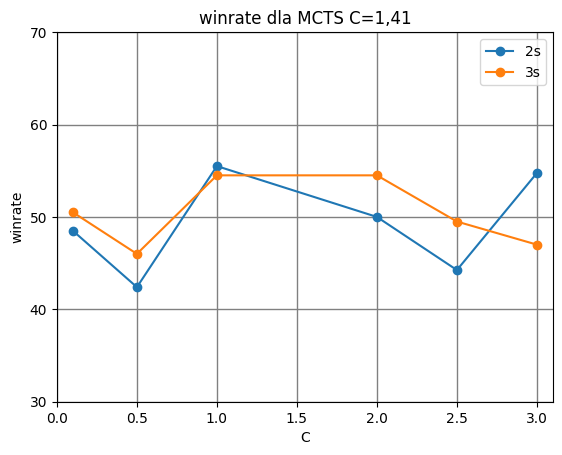

In [22]:
df_vs_stats = pd.read_sql('select * from simulation_vs_stats', connection)

df_filtered = df_vs_stats[df_vs_stats.PRIMARY_PARAMETER == 'MCTS_2_0_n_1,41']
df_filtered = df_filtered.sort_values(by=['C'])
plt.plot(df_filtered.C, df_filtered.WINRATE, marker='o', label='2s')

df_filtered = df_vs_stats[df_vs_stats.PRIMARY_PARAMETER == 'MCTS_3_0_n_1,41']
df_filtered = df_filtered.sort_values(by=['C'])
plt.plot(df_filtered.C, df_filtered.WINRATE, marker='o', label='3s')

plt.legend()
plt.title(f'winrate dla MCTS C=1,41')
plt.xlim([0, 3.1])
plt.yticks(range(30, 71, 10))
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('C')
plt.ylabel('winrate')
plt.show()

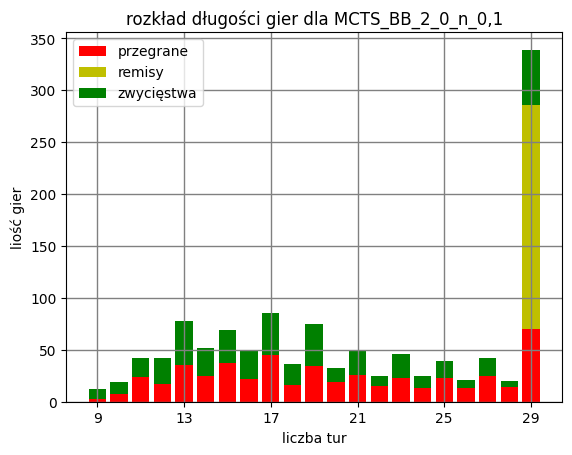

In [ ]:
df_turn_stats = pd.read_sql('select * from simulation_turn_stats', connection)
parameter = 'MCTS_BB_2_0_n_0,1'
df_filtered = df_turn_stats[(df_turn_stats.PARAMETER == parameter) & (df_turn_stats.WINS+df_turn_stats.DRAWS + df_turn_stats.LOSES> 10)]
df_filtered = df_filtered.sort_values(by=['TURN_CNT'])
plt.bar(df_filtered.TURN_CNT, df_filtered.LOSES, color='r')
plt.bar(df_filtered.TURN_CNT, df_filtered.DRAWS, bottom=df_filtered.LOSES, color='y')
plt.bar(df_filtered.TURN_CNT, df_filtered.WINS, bottom=df_filtered.LOSES+df_filtered.DRAWS, color='g')
plt.title(f'rozkład długości gier dla {parameter}')
plt.xticks(range(df_filtered.iloc[0]['TURN_CNT'], 30,4))
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(["przegrane", "remisy", "zwycięstwa"])
plt.xlabel('liczba tur')
plt.ylabel('liość gier')
plt.show()

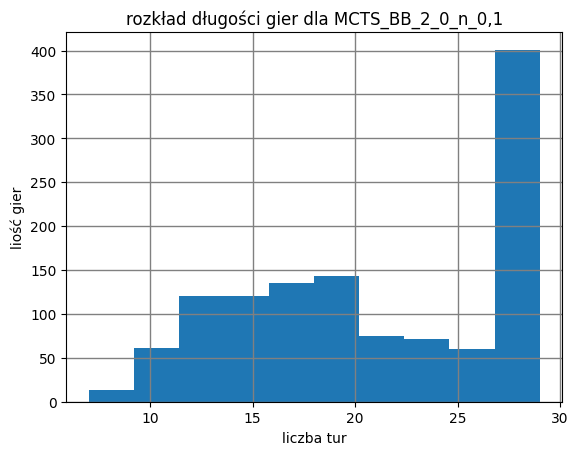

In [ ]:
df_turn_stats = pd.read_sql('select * from simulations', connection)
parameter = 'MCTS_BB_2_0_n_0,1'
df_filtered = df_turn_stats[(df_turn_stats.RED_PLAYER == parameter) | (df_turn_stats.BLUE_PLAYER == parameter)]
df_filtered = df_filtered.sort_values(by=['TURN_CNT'])
plt.hist(df_filtered.TURN_CNT)
# plt.plot(df_filtered.TURN_CNT, df_filtered.WINS + df_filtered.LOSES + df_filtered.DRAWS)
plt.title(f'rozkład długości gier dla {parameter}')
# plt.xlim([df_filtered.iloc[0]['TURN_CNT'], df_filtered.iloc[-1]['TURN_CNT']])
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('liczba tur')
plt.ylabel('liość gier')
plt.show()